In [29]:
import numpy as np 
import pandas as pd
import pyarrow

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report

In [ ]:
StratifiedKFold(n_splits = 3, random_state = 42, shuffle=True)
predict_dict = {}
for train_ind, test_ind in StratifiedKFold.split(X, y):
    X_train = X.loc[train_ind, features]
    X_test = X.loc[test_ind, features]    
    
    y_train = X.loc[train_ind, target]
    y_test = X.loc[test_ind,  target]    
    
    model = LogisticRegression()
    model.fit(X_train, p_train)
    
    p_train = model.predict_proba(X_train)[:,1 ]    
    p_test = model.predict_proba(X_test)[:,1 ]
    
    predict_dict.apend({"p_test":p_test,
                        "y_test":y_test,
                        "p_train":p_train,
                        "y_train":y_train})

In [8]:
!pwd

/Users/user/Downloads/lenta-data


In [30]:
!ls -lah

total 2539440
drwxr-xr-x@  12 user  staff   384B Jan 16 00:10 .
drwx------@ 490 user  staff    15K Jan 15 06:23 ..
drwxr-xr-x    8 user  staff   256B Jan 15 21:46 .ipynb_checkpoints
-rw-r--r--@   1 user  staff   4.7M Sep 18 16:40 clients.csv
-rw-r--r--@   1 user  staff   9.9K Dec 28 08:46 data description.xlsx
-rw-r--r--    1 user  staff    56K Jan 15 22:39 df_stat.csv
-rw-r--r--    1 user  staff   288K Jan 15 21:49 lenta.ipynb
-rw-r--r--    1 user  staff   1.5M Jan 16 00:10 lenta2.ipynb
-rw-r--r--@   1 user  staff    18M Sep 18 16:38 materials.csv
-rw-r--r--@   1 user  staff    16K Sep 18 16:38 plants.csv
-rw-r--r--@   1 user  staff   1.8K Jan  7 23:29 readme.txt
-rw-r--r--@   1 user  staff   1.2G Dec 28 16:42 transactions.parquet


In [31]:
pd.read_csv("clients.csv")

,client_id,gender,city,birthyear
0,1a47d62dddacc03fe90c15652f7ae1a4,M,Other,1990.0
1,9cb909f701d25d548e953bff81192b56,F,Other,1969.0
2,d5da0f5b841b4f83383202807995027a,M,Other,1976.0
3,13ed7f16810b17b8cee6de834ac79a48,F,Moscow,1966.0
4,215fe3ea7d5bf0415e5504e2a7f33551,F,Other,1988.0
...,...,...,...,...
99990,9e7e66fc2c2dcfd8977bc0cffeff8eb5,M,Other,1985.0
99991,e261c97d40ab839926c712b4aa6cefd8,F,St. Petersburg,1982.0
99992,678ef46f41f8c89f7e8578c9e9592e3e,M,Other,1964.0
99993,274facf0609ceba803f5853bd2222208,F,Other,1951.0


In [9]:
%%time
filepath = 'transactions.parquet'
transactions = pd.read_parquet(filepath, engine='pyarrow')

CPU times: user 18.4 s, sys: 6.26 s, total: 24.7 s
Wall time: 11.4 s


In [10]:
import sys
sys.getsizeof(filepath)

69

In [12]:
# transactions.info(memory_usage='deep')

In [13]:
transactions['chq_position'].describe()

count     32109414
unique         459
top            001
freq       2750895
Name: chq_position, dtype: object

In [14]:
%%time
transactions.head()

CPU times: user 316 µs, sys: 33 µs, total: 349 µs
Wall time: 347 µs


,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.0,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.0,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.0,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.0,53.98,1


In [15]:
df = transactions

### plan:
    1) Количетсво уникальных значений +
    1.0) Почему транзакций больше чем id транзакции
    1.1) макси мин день
    2) DAY, MAU график где х - день/месяц y - количство пользователей / транзакций / товаров

    3) График по дням недели

In [16]:
df.shape

(32109414, 9)

In [17]:
for key in df.keys():
    print(f"{key} {' '*(40-len(key))}  {df[key].nunique()}")

chq_id                                     2964775
plant                                      388
chq_date                                   366
chq_position                               459
client_id                                  100000
material                                   105694
sales_count                                9359
sales_sum                                  173839
is_promo                                   2


In [18]:
df.groupby('chq_id').apply(len).sort_values()

chq_id
26fd461b3dd3d784507304f72fba02b8      1
9f659099a0ca6bf4634965b9b264003b      1
7cd4721a1a6ec109fee93b08d705ceb0      1
2a578f11b3aec7ce8fa0297b30b39b5b      1
d9ab1b5163fac7fd803fcc69d83aece0      1
                                   ... 
fc116312788e5800dcacc38c46619514    206
c68b39ff3a7f5210f17658c034a9d997    215
43a3eb055a2cd3b44587a03db3204f4c    218
be26faeae3ab7a98915c6c49387d57e4    225
5d06e994d1c84b7c16bb50f61da8152a    244
Length: 2964775, dtype: int64

In [19]:
df[df['chq_id'] == 'ce5b3d1c531348c5d0d8e859b6d0cf91'].sort_values('chq_position')#df[df['chq_id'] == 'ce5b3d1c531348c5d0d8e859b6d0cf91'].sort_values('')

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
5,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,001,90fca68123e692a005a4edeadd94b2f2,76608b1b1d38384fcac3e2b14e6ec0c9,2.000,64.78,1
11,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,002,90fca68123e692a005a4edeadd94b2f2,ada84ea081d5d3c919dc12a5bdde904e,1.000,179.99,1
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.000,249.99,1
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.000,146.98,0
9,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,005,90fca68123e692a005a4edeadd94b2f2,b726b2ec8d0643d38e29d96733153dd4,2.000,51.98,1
6,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,006,90fca68123e692a005a4edeadd94b2f2,86069eddeab2b94b00eca5801628c879,0.728,65.51,0
8,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,007,90fca68123e692a005a4edeadd94b2f2,f6f07df28266b03cb7822b62abf0a385,2.000,72.99,1
10,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,008,90fca68123e692a005a4edeadd94b2f2,33fa1fd7d0c11ccde404416d63e9b50a,1.000,549.94,1
12,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,009,90fca68123e692a005a4edeadd94b2f2,e09bae8a6aa3492347bef47d9913344a,1.000,64.89,0
7,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,010,90fca68123e692a005a4edeadd94b2f2,cd8645ab842a98332560a07d137aed24,1.000,36.99,1


In [20]:
df.groupby('chq_id')['chq_date'].nunique().sort_values()

chq_id
00000391443926003b45cebac9a4c0b2    1
aa9396b8fb0c77d0b3212a11c6c001d0    1
aa93a13cc6647f4a4040778ea2518e87    1
aa93a620266697563a6f5d49bcf84d21    1
aa93abce2f67950a13c8eb049962ae5e    1
                                   ..
55578139ad4d993942819014035f8c13    1
5557935b6247e2ffbdd80c311179ece9    1
555793833019971b3b6ecd3a40a046bb    1
5557bd59e8afe67d52fd84c6b75a237a    1
fffff22a5bb4ef42a166e2e20cff0d14    1
Name: chq_date, Length: 2964775, dtype: int64

In [21]:
df.groupby('chq_id')['chq_date'].nunique()

chq_id
00000391443926003b45cebac9a4c0b2    1
0000086694a97b18d2b5e5cfc309ab76    1
00000b7bb8fd947f62aeed1bba4b6fbb    1
00000d5d627d67cacb2ba17705635ca7    1
000010ba9e98d7316de3a8a862fc2d49    1
                                   ..
ffffd6f2803cf3b69d95168106cbe9d1    1
ffffed38610c9d70da9e9b8f0e1be363    1
ffffed49d82deb7e43b1eedbebe19b96    1
ffffefbe86e46eba972b50f30c74a14c    1
fffff22a5bb4ef42a166e2e20cff0d14    1
Name: chq_date, Length: 2964775, dtype: int64

In [22]:
df.groupby('chq_id')['client_id'].nunique().sort_values()

chq_id
00000391443926003b45cebac9a4c0b2    1
aa9396b8fb0c77d0b3212a11c6c001d0    1
aa93a13cc6647f4a4040778ea2518e87    1
aa93a620266697563a6f5d49bcf84d21    1
aa93abce2f67950a13c8eb049962ae5e    1
                                   ..
55578139ad4d993942819014035f8c13    1
5557935b6247e2ffbdd80c311179ece9    1
555793833019971b3b6ecd3a40a046bb    1
5557bd59e8afe67d52fd84c6b75a237a    1
fffff22a5bb4ef42a166e2e20cff0d14    1
Name: client_id, Length: 2964775, dtype: int64

Text(0, 0.5, 'Number of transactions')

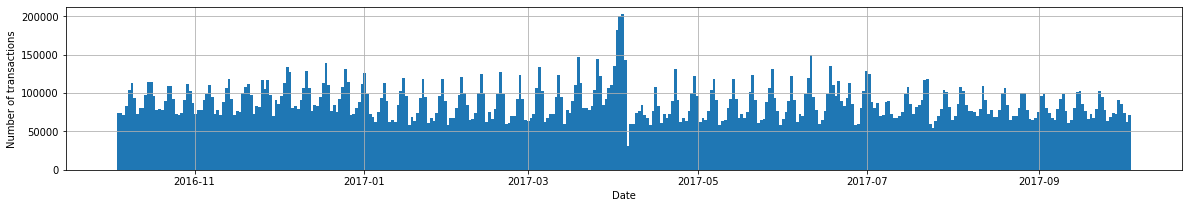

In [23]:
df['chq_date'].hist(figsize = (20, 3), bins = df['chq_date'].nunique())
plt.xlabel('Date')
plt.ylabel('Number of transactions')

In [24]:
# Данные идут всегда через день?
# Да, равномерно через день
set(np.diff(sorted(df["chq_date"].unique())))

{numpy.timedelta64(86400000000000,'ns')}

In [25]:
%%time
np.sort(np.diff(np.sort(df['chq_date'].unique())))

CPU times: user 139 ms, sys: 2.7 ms, total: 142 ms
Wall time: 140 ms


array([86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
       86400000000000, 86400000000000, 86400000000000, 86400000000000,
      

In [ ]:
# # ключ - дата (месяц/день)

# # количество денег в эту дату
# +

# # количество транзакций в эту дату
# +

# # количество уникальных клиентов
# +

# # количество проданных уникальных товаров
# +
# # среднее количество позиций в чеке

# # средняя цена товара

# # количество промо товаров в транзе
# # доля промо товаров в транзе

# # разбить по магазинам



In [ ]:
#построим таблицу, проиндексированную по датам, сохранив ее
#len - число строк для данной даты в исх. таблице
# user_unique - число уникальных клиентов в день
# transaction_unique - число уникальнных транзакций в день
# sales_sum - за день продано на такую сумму
# sales_count - число проданных товаров
# average_sum - средняя сумма транзы в день
# material - число уникальных товаров, которые были проданы в этот день
# is_promo_sum - суммарное число проданных промо товаров в день
# is_promo_per_trans - среднее число проданных по промо товаров на транзакцию в этот день
# is_promo_sales_sum_sum - общая стоимость проданных по промо товаров
# is_promo_sales_sum_mean - общая сумма купленного по промо по отношению к общей сумме проданного в день
#unique_plant - число магазинов, в которых что-то было продано в этот день

def get_day_features(data):
    res = {'len' : len(data),
           'user_unique': data['client_id'].nunique(),
           'transaction_unique':data['chq_id'].nunique(),
           'sales_sum':data['sales_sum'].sum(),
           'sales_count':data['sales_count'].sum(),
           'average_sum':data['sales_sum'].mean(),
           'material':data['material'].nunique(),
           'is_promo_sum':data['is_promo'].sum(),
           'is_promo_per_trans':data['is_promo'].mean(),
           'is_promo_sales_sum_sum':data.loc[data['is_promo']==1, 'sales_sum'].sum(),
           'is_promo_sales_sum_mean':data.loc[data['is_promo']==1, 'sales_sum'].sum()/data['sales_sum'].sum(),
           'unique_plant':data['plant'].nunique()
          }
    return pd.Series(res)

df_stat = df.groupby('chq_date').apply(get_day_features)
df_stat.to_csv(r'df_stat.csv')


In [ ]:
df_stat = pd.read_csv('df_stat.csv', index_col = 'chq_date')
df_stat

In [ ]:
for key in df_stat.keys():
    df_stat[key].plot(figsize = (20, 3), title = key)
    #df_stat[key][-140-7*12:-112-7*12].reset_index(drop=True).plot(figsize = (20, 3), title = key)


    plt.show()
    
# есть сильная зависимость по дням
# по выходным на 50-70% лучше чем на неделе

# сезонной ззависимости мало

# есть небольшой общий тренд на понижение

# в апреле что-то случилось

In [ ]:
#возле апреля интересно поведени графика average sum - средняя сумма транзакции росла в теч. месяца до странного события
#это могло бы объяснить некоторые графики, но не уникальное число покупателей в день - user_unique
#т.е. ближе к апрелю росло число покупателей И их средний чек
#конец какой-то скидочной программы? если и так, то это не промо-товары из таблицы: доля промо товаров в чеке и доля промо в проданном 
#не росли, подходя к рассматриваемой точке
#возможно, другая бонусная программа

In [ ]:
df_stat['unique_plant'].diff().plot(figsize = (20, 3), title = 'unique plant diff')
plt.show()

In [ ]:
df_stat.columns

### График 
 - топ магазинов на начало и на конец периода +
 
##### Сделаем в ходе создания признаков
 
 - количество покупок у одного клиента
 - средний чек у одного клиента
 - количество товаров у одного клиента

In [ ]:
df['chq_date'].min()

In [ ]:
df.loc[df['plant']=='29549a71a57f587d88209b9c1f1b7999', 'chq_date'].hist(bins = 366)
df.loc[df['plant']=='95b09698fda1f64af16708ffb859eab9', 'chq_date'].hist(bins = 366)
plt.show()

In [ ]:
l = df['chq_date'].min()
r = df['chq_date'].min()+timedelta(days = 31)

df0 = df[(df['chq_date']<r) & (df['chq_date']>l) ]

l = df['chq_date'].max()-timedelta(days = 31)
r = df['chq_date'].max()

df1 = df[(df['chq_date']<r) & (df['chq_date']>l) ]

In [ ]:
a = df0.groupby('plant')[['sales_sum']].sum().sort_values('sales_sum', ascending = False).rename(columns = {'sales_sum':'first'}).reset_index()
b = df1.groupby('plant')[['sales_sum']].sum().sort_values('sales_sum', ascending = False).rename(columns = {'sales_sum':'last'}).reset_index()

print(len(a), len(b))
df_store_stat = pd.merge(a, b, 
                      how = 'outer',
                      on = 'plant')
df_store_stat[:40]

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(df_store_stat['first'], df_store_stat['last'])
t = max(df_store_stat['first'])
plt.plot([0, t], [0, t], color = 'red', linestyle = '--', linewidth = 5, alpha = 0.5)
plt.title('money sum', size = 22)
plt.ylabel('last month', size = 18)
plt.xlabel('first month', size = 18)
plt.show()
#первый и после месяцы

In [ ]:
#>> 1 и 2 месяц
#>> месяц до херни/после херни
#>> два месяц до херни/после херни

377 380


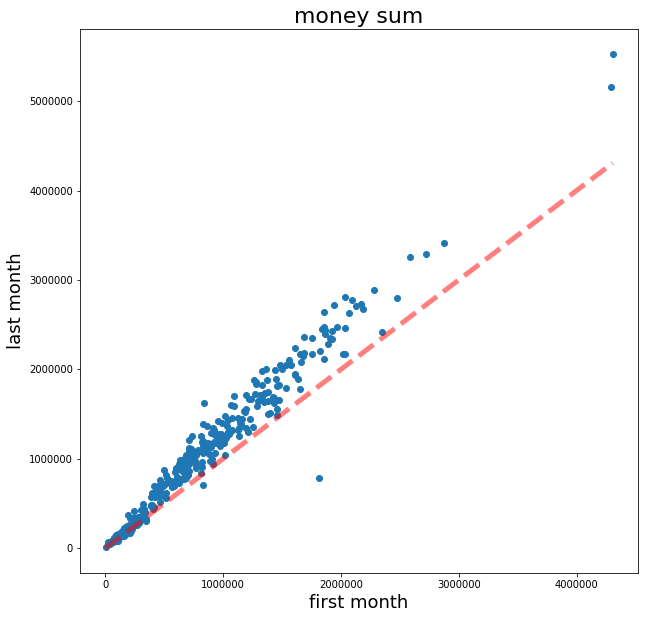

In [122]:
l = pd.to_datetime("2017-01-01")#df['chq_date'].min()
r = pd.to_datetime("2017-02-01")#df['chq_date'].min()+timedelta(days = 31)

df0 = df[(df['chq_date']<r) & (df['chq_date']>l) ]

l = pd.to_datetime("2017-03-01")#df['chq_date'].min()+timedelta(days = 31)+timedelta(days = 31)+timedelta(days = 31)
r = pd.to_datetime("2017-04-01")#df['chq_date'].min()+timedelta(days = 31)+timedelta(days = 31)+timedelta(days = 31)+timedelta(days = 31)


df1 = df[(df['chq_date']<r) & (df['chq_date']>l) ]

a = df0.groupby('plant')[['sales_sum']].sum().sort_values('sales_sum', ascending = False).rename(columns = {'sales_sum':'first'}).reset_index()
b = df1.groupby('plant')[['sales_sum']].sum().sort_values('sales_sum', ascending = False).rename(columns = {'sales_sum':'last'}).reset_index()

print(len(a), len(b))
df_store_stat = pd.merge(a, b, 
                      how = 'outer',
                      on = 'plant')

plt.figure(figsize = (10, 10))
plt.scatter(df_store_stat['first'], df_store_stat['last'])
t = max(df_store_stat['first'])
plt.plot([0, t], [0, t], color = 'red', linestyle = '--', linewidth = 5, alpha = 0.5)
plt.title('money sum', size = 22)
plt.ylabel('last month', size = 18)
plt.xlabel('first month', size = 18)
plt.show()
#2 месяца до кризиса

380 380


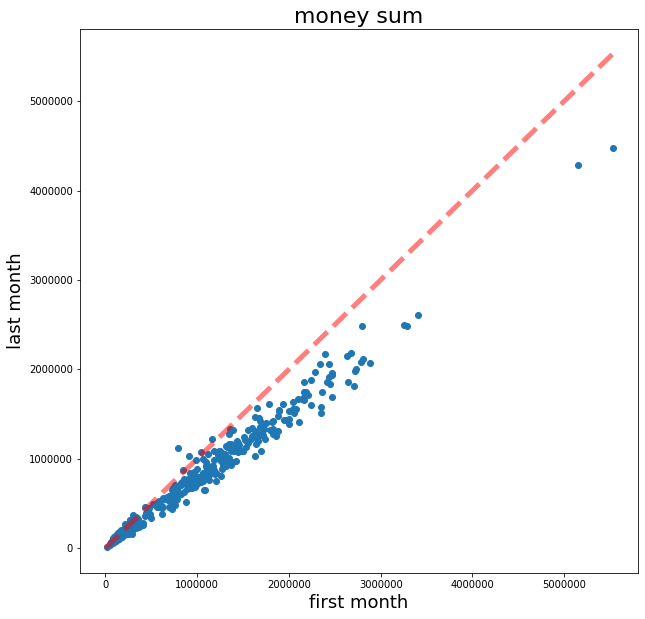

In [121]:
l = pd.to_datetime("2017-03-01")#df['chq_date'].min()
r = pd.to_datetime("2017-04-01")#df['chq_date'].min()+timedelta(days = 31)

df0 = df[(df['chq_date']<r) & (df['chq_date']>l) ]

l = pd.to_datetime("2017-05-01")#df['chq_date'].min()+timedelta(days = 31)+timedelta(days = 31)+timedelta(days = 31)
r = pd.to_datetime("2017-06-01")#df['chq_date'].min()+timedelta(days = 31)+timedelta(days = 31)+timedelta(days = 31)+timedelta(days = 31)


df1 = df[(df['chq_date']<r) & (df['chq_date']>l) ]

a = df0.groupby('plant')[['sales_sum']].sum().sort_values('sales_sum', ascending = False).rename(columns = {'sales_sum':'first'}).reset_index()
b = df1.groupby('plant')[['sales_sum']].sum().sort_values('sales_sum', ascending = False).rename(columns = {'sales_sum':'last'}).reset_index()

print(len(a), len(b))
df_store_stat = pd.merge(a, b, 
                      how = 'outer',
                      on = 'plant')

plt.figure(figsize = (10, 10))
plt.scatter(df_store_stat['first'], df_store_stat['last'])
t = max(df_store_stat['first'])
plt.plot([0, t], [0, t], color = 'red', linestyle = '--', linewidth = 5, alpha = 0.5)
plt.title('money sum', size = 22)
plt.ylabel('last month', size = 18)
plt.xlabel('first month', size = 18)
plt.show()

#гипотеза о том, что конкретный магазин закрылся не оправдалась - у всех магазинов в апреле по сравнению с мартом и маем упал оборот

In [2]:
# Перенести наверх
# колонка количество товаров в транзакции (с учетом дубликатов)
dct = df.groupby('chq_id')['sales_count'].sum().to_dict()
df['chq_id_sum_sales_count'] = df['chq_id'].apply(lambda x:dct[x])

# колонка количество товаров в транзакции (без учетом дубликатов)
dct = df.groupby('chq_id').apply(len).to_dict()
df['chq_id_len'] = df['chq_id'].apply(lambda x:dct[x])

# сумма sales_sum товров в транзакции
dct = df.groupby('chq_id')['sales_sum'].sum().to_dict()
df['chq_id_sum_sales_sum'] = df['chq_id'].apply(lambda x:dct[x])


# Перенести наверх

NameError: name 'df' is not defined

In [136]:
# Very strange
df[df['chq_id_sum_sales_sum']==df['chq_id_sum_sales_sum'].min()]
# df[df['chq_id']=='61b17e3843e880f6bd51324a8d94610e']

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo,chq_id_sum_sales_count,chq_id_len,chq_id_sum_sales_sum
31431694,61b17e3843e880f6bd51324a8d94610e,c81c2b9e997a81f84838cd8e60b93a01,2016-10-21,001,596f837a638189cb15e9d4b144dd45c4,df61ac05dd83388e5b5c766cf4fcb312,-60.0,-98388.0,0,-60.0,1,-98388.0


In [140]:
(df.drop_duplicates('chq_id')['chq_id_sum_sales_sum']<0).sum()

14878

In [141]:
(df.drop_duplicates('chq_id')['chq_id_sum_sales_sum']>0).sum()

2949897

In [145]:
# sales count is дробный
df['sales_count'].apply(lambda x:int(x)!=x).mean()

0.18757436681964984

In [174]:
# Сколько отрицательных чеков
(df.drop_duplicates('chq_id')['chq_id_sum_sales_sum']<0).mean()

0.005018256022801056

In [175]:
# Сколько отрицательных товаров
(df['sales_sum']<0).mean()

0.0007092312553570738

In [146]:
df[df['sales_count'].apply(lambda x:int(x)!=x)]

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo,chq_id_sum_sales_count,chq_id_len,chq_id_sum_sales_sum
6,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,006,90fca68123e692a005a4edeadd94b2f2,86069eddeab2b94b00eca5801628c879,0.728,65.51,0,17.728,13,1634.0
21,9645891030b4a3d0dee526c47dcbcd13,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,022,4d68fdddb5deaa496ce485bd51929ab1,47bfa11c5a25b4dfefbd5f19bf9cf431,0.230,230.00,0,48.620,49,4607.0
27,9645891030b4a3d0dee526c47dcbcd13,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,030,4d68fdddb5deaa496ce485bd51929ab1,41179cd95c6a256294feed23fbb2d8e3,0.560,44.79,1,48.620,49,4607.0
30,9645891030b4a3d0dee526c47dcbcd13,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,4d68fdddb5deaa496ce485bd51929ab1,d66c44ca2800163901f22ec5fb4f1021,0.871,261.29,1,48.620,49,4607.0
37,9645891030b4a3d0dee526c47dcbcd13,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,033,4d68fdddb5deaa496ce485bd51929ab1,77bbdd705ed06bfc4158e0a858df74b3,0.748,59.76,0,48.620,49,4607.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32109404,37b3f0cdc086f820942fdcad8f8b583e,6d9ff949640422493f3db836c3035c64,2016-10-31,009,4cc84331fe90f77681ad374faaf86317,811722b031035ea43afa1dd028b9759c,0.318,209.88,1,10.800,11,1852.0
32109409,37b3f0cdc086f820942fdcad8f8b583e,6d9ff949640422493f3db836c3035c64,2016-10-31,003,4cc84331fe90f77681ad374faaf86317,82cfb8081737e152146b7bc10441bd00,0.795,215.44,1,10.800,11,1852.0
32109410,b1a59187a28741b3cc8c7e2a51711e8a,6d9ff949640422493f3db836c3035c64,2016-10-31,001,7ed222a4d1772e52669d844ec9830a9a,55ad93c2949b2ac7b3c0fe4dae8ead3d,1.840,34.94,1,5.452,4,314.0
32109411,b1a59187a28741b3cc8c7e2a51711e8a,6d9ff949640422493f3db836c3035c64,2016-10-31,003,7ed222a4d1772e52669d844ec9830a9a,55ad93c2949b2ac7b3c0fe4dae8ead3d,1.710,32.47,1,5.452,4,314.0


In [173]:
# df['chq_id_sum_sales_sum'].hist()
# plt.hist()
# np.ones(o_current)/len(o_current)

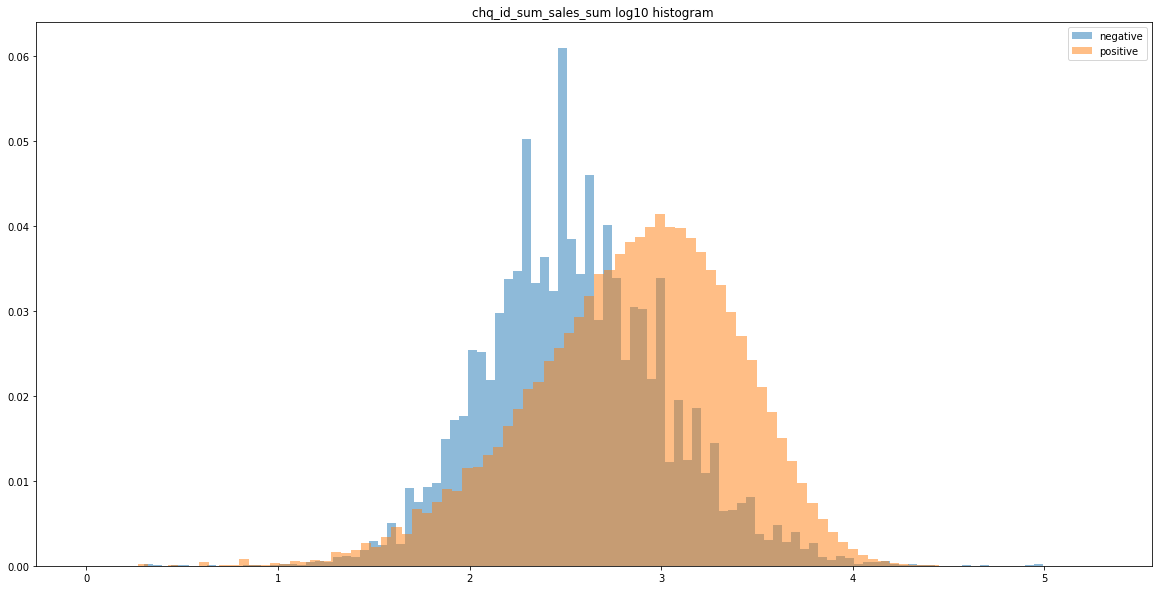

In [158]:
o = df.drop_duplicates('chq_id')
plt.figure(figsize = (20, 10))
o_current = o.loc[o['chq_id_sum_sales_sum']<0, 'chq_id_sum_sales_sum'].apply(lambda x:np.log10(1-x))
w = np.ones(len(o_current))/len(o_current)
plt.hist(o_current, weights=w, bins = 100, label = 'negative', alpha = 0.5)
plt.title('chq_id_sum_sales_sum log10 histogram ')

o_current = o.loc[o['chq_id_sum_sales_sum']>=0, 'chq_id_sum_sales_sum'].apply(lambda x:np.log10(1+x))
w = np.ones(len(o_current))/len(o_current)
plt.hist(o_current, weights=w, bins = 100, label = 'positive', alpha = 0.5)
plt.legend()
plt.show()

# В логарифмических осях построить распределение chq_id_sum_sales_sum, должно выйти лог-нормальное распределение

In [162]:
# Проверим что это отмена
print('<0 correct', (df.loc[df['chq_id_sum_sales_sum']<0, 'sales_sum']<0).all())
print('>0 correct', (df.loc[df['chq_id_sum_sales_sum']>0, 'sales_sum']>0).all())

<0 correct True
>0 correct True


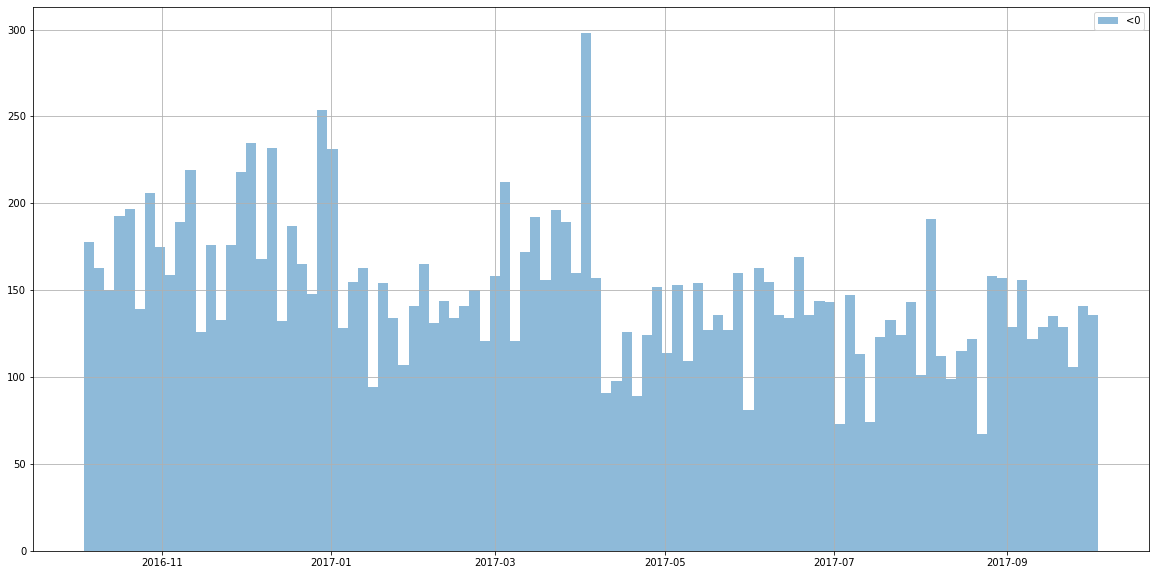

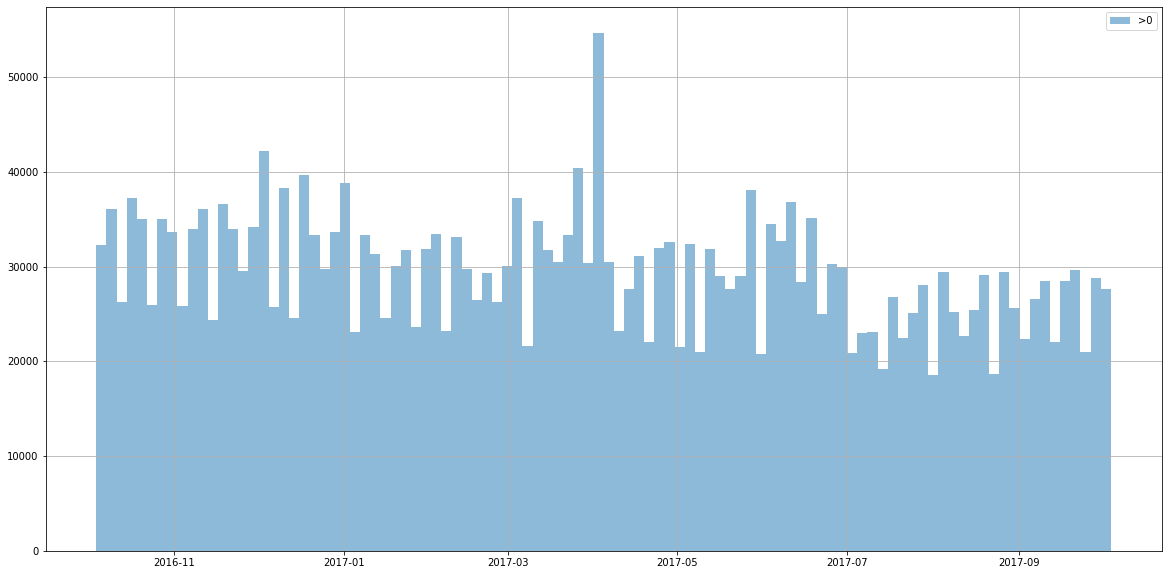

In [176]:
df.loc[df['chq_id_sum_sales_sum']<0].drop_duplicates('chq_id')['chq_date'].hist(label = '<0', figsize = (20, 10), alpha = 0.5, bins = 100)
plt.legend()
plt.show()

df.loc[df['chq_id_sum_sales_sum']>=0].drop_duplicates('chq_id')['chq_date'].hist(label = '>0', figsize = (20, 10),alpha = 0.5, bins = 100)
plt.legend()
plt.show()

In [168]:
df.loc[df['chq_id_sum_sales_sum']<0].sort_values('chq_id_sum_sales_sum')

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo,chq_id_sum_sales_count,chq_id_len,chq_id_sum_sales_sum
31431694,61b17e3843e880f6bd51324a8d94610e,c81c2b9e997a81f84838cd8e60b93a01,2016-10-21,001,596f837a638189cb15e9d4b144dd45c4,df61ac05dd83388e5b5c766cf4fcb312,-60.0,-98388.00,0,-60.0,1,-98388.00
31431709,cc50070834892c5348978d9d3f3c9cb5,c81c2b9e997a81f84838cd8e60b93a01,2016-10-21,003,596f837a638189cb15e9d4b144dd45c4,639744133763da589ad3055d293b9154,-48.0,-34236.00,0,-120.0,3,-95251.00
31431699,cc50070834892c5348978d9d3f3c9cb5,c81c2b9e997a81f84838cd8e60b93a01,2016-10-21,002,596f837a638189cb15e9d4b144dd45c4,ec13cc81075855dfe31e2fb8116344ed,-4.0,-3389.76,0,-120.0,3,-95251.00
31431690,cc50070834892c5348978d9d3f3c9cb5,c81c2b9e997a81f84838cd8e60b93a01,2016-10-21,001,596f837a638189cb15e9d4b144dd45c4,ec13cc81075855dfe31e2fb8116344ed,-68.0,-57625.24,0,-120.0,3,-95251.00
31431703,af2b422068ed54af49ef0275520314a7,c81c2b9e997a81f84838cd8e60b93a01,2016-10-21,003,596f837a638189cb15e9d4b144dd45c4,df61ac05dd83388e5b5c766cf4fcb312,-10.0,-16398.00,0,-100.0,3,-94689.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17187510,113e16efd4d3653ea360ba14fab7c1e0,56c66132e67551c55b1667f9b14de886,2017-04-05,001,18b4bee65b54e69f28ec71c4e49660d2,e157c57ca48445c18680a86767f4c997,-1.0,-1.37,1,-1.0,1,-1.37
28010290,caba8f8f97354ffaaccf5d9ff9a42a92,2ebe25dd3a566f36f80d55440d3c3834,2017-08-19,001,806aa67e23892d029172d4347da3310a,d24abc923a61543ffc13ccace7cb5da4,-1.0,-1.00,1,-1.0,1,-1.00
28241201,83549160c46d0cabdea5abdf7ee7171b,2d0974b2436345d99f7152c3fc44a609,2017-08-25,001,d3b66ff3c56a962b5b4146d46a6940be,d3e97c413ab082ba9e5fe06d053e9f25,-1.0,-1.00,0,-1.0,1,-1.00
14176442,f50e725f14a879adb1d173467f4cf560,62a8d042a93d5f88fb6636cde700ce69,2017-04-04,001,35be5e61ba319475211d55cd64ffcc5e,cfe5b2573c75bb74848a1ae7da2e628a,-1.0,-1.00,1,-1.0,1,-1.00


In [169]:
df.loc[df['chq_id_sum_sales_sum']==-1.37]

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo,chq_id_sum_sales_count,chq_id_len,chq_id_sum_sales_sum
17187510,113e16efd4d3653ea360ba14fab7c1e0,56c66132e67551c55b1667f9b14de886,2017-04-05,001,18b4bee65b54e69f28ec71c4e49660d2,e157c57ca48445c18680a86767f4c997,-1.0,-1.37,1,-1.0,1,-1.37


In [170]:
df.loc[df['chq_id_sum_sales_sum']==1.37]

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo,chq_id_sum_sales_count,chq_id_len,chq_id_sum_sales_sum


In [ ]:
df.loc[df['chq_id_sum_sales_sum']<0]

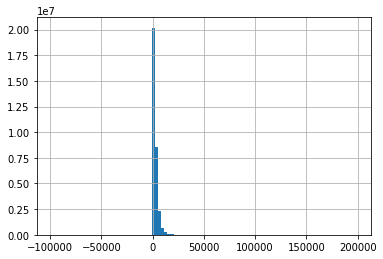

In [138]:
df['chq_id_sum_sales_sum']<0.hist(bins = 100)

In [177]:
%%time

def foo(data):
    res = {'t_min'  : data['chq_date'].min(),
           't_max'  : data['chq_date'].max(),
           '_t_list' : data['chq_date'].unique(),
           'N' : data['chq_id'].nunique(),
           'sales_count_sum':data['sales_count'].sum(),
           'sales_count_sum':data['sales_count'].sum(),
           'chq_id_sum_sales_count_mean':data['chq_id_sum_sales_count'].mean(),
           'chq_id_len_mean':data['chq_id_len'].mean(),
           'chq_id_sum_sales_sum_mean':data['chq_id_sum_sales_sum'].mean(),
           
           'chq_id_sum_sales_count_min':data['chq_id_sum_sales_count'].min(),
           'chq_id_len_min':data['chq_id_len'].min(),
           'chq_id_sum_sales_sum_min':data['chq_id_sum_sales_sum'].min(),
           
           'chq_id_sum_sales_count_max':data['chq_id_sum_sales_count'].max(),
           'chq_id_len_max':data['chq_id_len'].max(),
           'chq_id_sum_sales_sum_max':data['chq_id_sum_sales_sum'].max(),
          }
    return pd.Series(res)

df_client = df.groupby('client_id').apply(foo)
df_client

CPU times: user 2min 40s, sys: 2.74 s, total: 2min 43s
Wall time: 2min 44s


,t_min,t_max,_t_list,N,sales_count_sum,chq_id_sum_sales_count_mean,chq_id_len_mean,chq_id_sum_sales_sum_mean,chq_id_sum_sales_count_min,chq_id_len_min,chq_id_sum_sales_sum_min,chq_id_sum_sales_count_max,chq_id_len_max,chq_id_sum_sales_sum_max
client_id,,,,,,,,,,,,,,
0000d48a8891cd462fdf01ea861ec53e,2016-10-31,2017-08-31,"[2016-11-20T00:00:00.000000000, 2016-12-27T00:...",40,966.731,29.579307,18.659091,2578.667208,-1.000,1,-249.00,48.114,29,4481.0
00028a1dcb30863404a386961a69300e,2016-10-09,2017-09-15,"[2016-11-02T00:00:00.000000000, 2016-12-22T00:...",34,470.427,23.418793,19.212435,2557.450777,1.000,1,45.00,58.973,44,5843.0
0004274683494a9eca5e70ef97299d55,2016-10-04,2017-10-04,"[2016-11-04T00:00:00.000000000, 2016-11-13T00:...",169,1407.353,11.373868,9.765000,821.640833,1.000,1,6.00,32.662,29,4737.0
00072f81efcb3481861f7300c5e2a88a,2016-10-29,2017-09-07,"[2016-11-17T00:00:00.000000000, 2016-11-21T00:...",8,44.596,8.663586,6.862069,833.758621,1.000,1,29.00,18.000,11,1812.0
00076596eb749cf10c2e984621dffe95,2016-10-05,2017-10-04,"[2016-11-29T00:00:00.000000000, 2016-11-30T00:...",166,3160.780,28.274646,18.109864,1757.810874,-1.000,1,-249.54,129.217,55,5979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb2f36eb72ff56d2ef7a2685714f01,2016-10-09,2017-09-16,"[2016-10-30T00:00:00.000000000, 2016-11-04T00:...",24,472.077,26.591655,20.214689,3215.587571,3.000,3,451.00,48.264,38,6382.0
fffb50df95231c0f090b5aa3f5332c7f,2016-10-08,2017-05-16,"[2016-10-30T00:00:00.000000000, 2016-11-05T00:...",17,245.586,71.602785,51.317949,5445.805128,1.000,1,39.00,128.455,91,9797.0
fffc3f2be1422d248dbeda4196ef0711,2016-10-13,2017-09-24,"[2016-11-29T00:00:00.000000000, 2016-11-18T00:...",30,315.646,14.982772,9.865116,1679.027907,1.535,2,116.00,34.231,20,3682.0


In [178]:
# df_client

,t_min,t_max,_t_list,N,sales_count_sum,chq_id_sum_sales_count_mean,chq_id_len_mean,chq_id_sum_sales_sum_mean,chq_id_sum_sales_count_min,chq_id_len_min,chq_id_sum_sales_sum_min,chq_id_sum_sales_count_max,chq_id_len_max,chq_id_sum_sales_sum_max
client_id,,,,,,,,,,,,,,
0000d48a8891cd462fdf01ea861ec53e,2016-10-31,2017-08-31,"[2016-11-20T00:00:00.000000000, 2016-12-27T00:...",40,966.731,29.579307,18.659091,2578.667208,-1.000,1,-249.00,48.114,29,4481.0
00028a1dcb30863404a386961a69300e,2016-10-09,2017-09-15,"[2016-11-02T00:00:00.000000000, 2016-12-22T00:...",34,470.427,23.418793,19.212435,2557.450777,1.000,1,45.00,58.973,44,5843.0
0004274683494a9eca5e70ef97299d55,2016-10-04,2017-10-04,"[2016-11-04T00:00:00.000000000, 2016-11-13T00:...",169,1407.353,11.373868,9.765000,821.640833,1.000,1,6.00,32.662,29,4737.0
00072f81efcb3481861f7300c5e2a88a,2016-10-29,2017-09-07,"[2016-11-17T00:00:00.000000000, 2016-11-21T00:...",8,44.596,8.663586,6.862069,833.758621,1.000,1,29.00,18.000,11,1812.0
00076596eb749cf10c2e984621dffe95,2016-10-05,2017-10-04,"[2016-11-29T00:00:00.000000000, 2016-11-30T00:...",166,3160.780,28.274646,18.109864,1757.810874,-1.000,1,-249.54,129.217,55,5979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb2f36eb72ff56d2ef7a2685714f01,2016-10-09,2017-09-16,"[2016-10-30T00:00:00.000000000, 2016-11-04T00:...",24,472.077,26.591655,20.214689,3215.587571,3.000,3,451.00,48.264,38,6382.0
fffb50df95231c0f090b5aa3f5332c7f,2016-10-08,2017-05-16,"[2016-10-30T00:00:00.000000000, 2016-11-05T00:...",17,245.586,71.602785,51.317949,5445.805128,1.000,1,39.00,128.455,91,9797.0
fffc3f2be1422d248dbeda4196ef0711,2016-10-13,2017-09-24,"[2016-11-29T00:00:00.000000000, 2016-11-18T00:...",30,315.646,14.982772,9.865116,1679.027907,1.535,2,116.00,34.231,20,3682.0


In [129]:
df[df['material']=='232cfe8b28970434f685b737737b26d4']

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo,chq_id_sum_sales_count
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.0,146.98,0,17.728
15,37d1f3b79bae03f8d3c279436139251e,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,eb09b11a1efb6e12f122e78bde33e5c3,232cfe8b28970434f685b737737b26d4,1.0,73.49,0,7.000
120,beb4140a10900a92c7071e7b88142ec8,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,cf38df617cbca4f1ada799c0075d68d1,232cfe8b28970434f685b737737b26d4,2.0,146.98,0,58.147
358,2ea3602c9dc2daacf36aac8bc805c4a3,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,022,ca973da2f6781a5de806ceca356ebfc1,232cfe8b28970434f685b737737b26d4,2.0,146.98,0,31.400
13356,48f699506390f384afce9c39cdf7aae1,87277281b55376d0231ad94f63e4a7eb,2016-11-01,008,48513563a2fabe37ba047fd2c7c29ec2,232cfe8b28970434f685b737737b26d4,1.0,73.49,0,60.840
...,...,...,...,...,...,...,...,...,...,...
32105155,167c494e5fbf87ddaca7954136eefa75,1640f59af9fc45f93a72652de254d387,2016-10-31,008,caf8eb8815f7076fa309dafbf6db0746,232cfe8b28970434f685b737737b26d4,3.0,220.47,0,26.756
32105241,30995e37aea3301774b2835f4e5c0a68,1640f59af9fc45f93a72652de254d387,2016-10-31,007,cef3928b04ce102bfea7a91b213f6ed9,232cfe8b28970434f685b737737b26d4,2.0,146.98,0,38.262
32105644,e184fdeb9a22059fe0a6d3967687d883,b94d71e6bc4cc21ffbaaef5e4aca6f03,2016-10-31,011,0f43fa421bd7d6412e129cc10f9206fc,232cfe8b28970434f685b737737b26d4,1.0,73.49,0,16.602
32108479,480ec525824e93cef34be3914336c8a8,fa6250961bd946dd412a36857953dea2,2016-10-31,005,14dc605ace9a0e6e6342f8fb7600bab8,232cfe8b28970434f685b737737b26d4,2.0,141.58,0,12.790


### План методология (разобраться с количество новых пользователей, количесвом churn)
     -[10 min] нарисовать график новые клиенты, ушедшие клиенты
     -[10 min] зафиксировать методологию
     -[?] *прикинуть максимальное качество решение задачи
     -[20 min] подготовить признаки + логистическая регрессия
     -[15 min] join таблицы с клиентами
     -[10 min] логистическая регрессия
     -[10 min] Random Forest

In [124]:
df

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,004,90fca68123e692a005a4edeadd94b2f2,232cfe8b28970434f685b737737b26d4,2.000,146.98,0
1,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,003,90fca68123e692a005a4edeadd94b2f2,12ec64451b8e426db16f3f05ea770901,1.000,249.99,1
2,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,012,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
3,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,013,90fca68123e692a005a4edeadd94b2f2,1212ff8ecf53aebef093ca8ae216db68,1.000,47.99,1
4,ce5b3d1c531348c5d0d8e859b6d0cf91,7cd86ecb09aa48c6e620b340f6a74592,2016-11-01,011,90fca68123e692a005a4edeadd94b2f2,571c6d3b559db8445e05265649eb30ab,2.000,53.98,1
...,...,...,...,...,...,...,...,...,...
32109409,37b3f0cdc086f820942fdcad8f8b583e,6d9ff949640422493f3db836c3035c64,2016-10-31,003,4cc84331fe90f77681ad374faaf86317,82cfb8081737e152146b7bc10441bd00,0.795,215.44,1
32109410,b1a59187a28741b3cc8c7e2a51711e8a,6d9ff949640422493f3db836c3035c64,2016-10-31,001,7ed222a4d1772e52669d844ec9830a9a,55ad93c2949b2ac7b3c0fe4dae8ead3d,1.840,34.94,1
32109411,b1a59187a28741b3cc8c7e2a51711e8a,6d9ff949640422493f3db836c3035c64,2016-10-31,003,7ed222a4d1772e52669d844ec9830a9a,55ad93c2949b2ac7b3c0fe4dae8ead3d,1.710,32.47,1
32109412,b1a59187a28741b3cc8c7e2a51711e8a,6d9ff949640422493f3db836c3035c64,2016-10-31,004,7ed222a4d1772e52669d844ec9830a9a,96dc1b235835fe9a29d0e9122a17ace3,1.000,21.10,0


In [17]:
clients = pd.read_csv('clients.csv', index_col = 'client_id')

In [38]:
#print(clients.head())
from tabulate import tabulate


print(tabulate(clients.head(), headers='keys', tablefmt='psql'))
print(tabulate(clients.tail(), headers='keys', tablefmt='psql'))


#clients.tail()

+----------------------------------+----------+--------+-------------+
| client_id                        | gender   | city   |   birthyear |
|----------------------------------+----------+--------+-------------|
| 1a47d62dddacc03fe90c15652f7ae1a4 | M        | Other  |        1990 |
| 9cb909f701d25d548e953bff81192b56 | F        | Other  |        1969 |
| d5da0f5b841b4f83383202807995027a | M        | Other  |        1976 |
| 13ed7f16810b17b8cee6de834ac79a48 | F        | Moscow |        1966 |
| 215fe3ea7d5bf0415e5504e2a7f33551 | F        | Other  |        1988 |
+----------------------------------+----------+--------+-------------+
+----------------------------------+----------+----------------+-------------+
| client_id                        | gender   | city           |   birthyear |
|----------------------------------+----------+----------------+-------------|
| 9e7e66fc2c2dcfd8977bc0cffeff8eb5 | M        | Other          |        1985 |
| e261c97d40ab839926c712b4aa6cefd8 | F       

In [40]:
transactions.sample()

,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
26654462,4901535a41ab3a87d90305175ce4e116,68a7e85c6872a4685c2e7a29ba330461,2017-08-09,005,abd8b86aaa6ec8949b5de47f823b7fb5,84d98a6ceb5244ce659c827a9da60479,1.0,38.19,1


In [8]:
transactions.describe()

,sales_count,sales_sum,is_promo
count,3.210941e+07,3.210941e+07,3.210941e+07
mean,1.319230e+00,1.228870e+02,4.833838e-01
std,2.015387e+00,2.502002e+02,4.997238e-01
min,-1.656000e+03,-9.838800e+04,0.000000e+00
25%,1.000000e+00,3.999000e+01,0.000000e+00
50%,1.000000e+00,7.398000e+01,0.000000e+00
75%,1.000000e+00,1.399900e+02,1.000000e+00
max,3.000000e+03,1.985715e+05,1.000000e+00


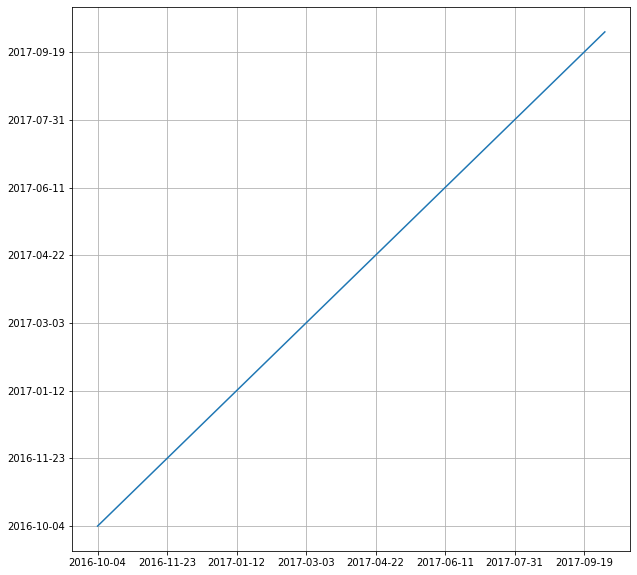

In [55]:
t_list = list(sorted(df['chq_date'].unique()))
plt.figure(figsize = (10,10))
plt.plot(list(range(len(t_list))), list(range(len(t_list))))
plt.xticks( range(len(t_list))[::50], [str(i)[:10] for i in t_list[::50]], fontsize = 10)
plt.yticks( range(len(t_list))[::50], [str(i)[:10] for i in t_list[::50]], fontsize = 10)


plt.grid()

In [57]:
# df_client > df_client>
!ls

clients.csv           lenta2.ipynb          results
data description.xlsx materials.csv         transactions.parquet
df_stat.csv           plants.csv
lenta.ipynb           readme.txt


In [59]:
pd.read_csv('materials.csv')['hier_level_1'].value_counts()

FOOD       57847
NONFOOD    47762
Name: hier_level_1, dtype: int64